<center><h1> Aplicación de los Métodos de Agrupamiento</h1></center>
<center><h1> Aprendizaje No Supervisado</h1></center>
<center><h1> Agrupamiento por jerárquico : Aglomerativo</h1></center>
<br>

### - Alexandro López González
### - Leonardo Pacheco Garduño
### - Manuel Garcia Sanes
<br>
<br>

En este notebook, realizaremos los siguiente:

- Aplicación del algoritmo aglomerativo  a los dos datasets seleccionados. 

- Evaluación de los resultados utilizando métricas intrínsecas o extrínsecas según sea el caso

- Análisis del resultado
<br>
<br>


## 1. Cargamos las librerias necesarias

In [1]:
import numpy as np
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score,calinski_harabaz_score



## 2. Cargamos el dataset con agrupamiento conocido

**Nombre:<br>

SEEDS<br>

**Abstract: 

Measurements of geometrical properties of kernels belonging to three different varieties of wheat. A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes.<br>

**Atributos (Reales): <br>

area A,<br>
perimeter P,<br>
compactness C = 4piA/P^2,<br>
length of kernel,<br>
width of kernel,<br>
asymmetry coefficient<br>
length of kernel groove. All of these parameters were real-valued continuous.<br>

**Instancias:**<br>

210<br>

URL:<br>
https://archive.ics.uci.edu/ml/datasets/seeds#


El dataset cargado tiene 210 instancias, 7 atributos y 3 clusters.


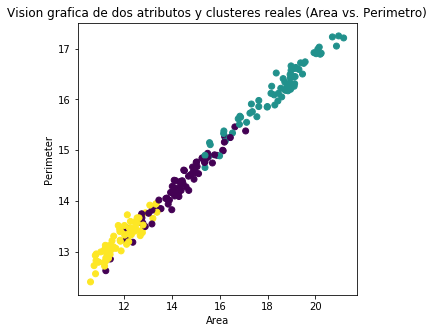

In [2]:
np.random.seed(31) # Fijamos una semilla para asegurar la reproducibilidad de la práctica

#Cargamos los datos
data_file_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt'

#Mezclamos y separamos la columa clase  
D = np.array(pd.read_csv(data_file_url,delimiter='\s+', header=None))
D = D[ np.random.choice(np.arange(D.shape[0]), D.shape[0], replace=False) ,:]
Dx = D[:,0:-1]
Dy = D[:,-1]

#Graficamos la parej de atributos seleccionada:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(Dx[:, 0], Dx[:, 1], c=Dy)
ax.set_xlabel("Area")
ax.set_ylabel("Perimeter")
ax.set_title("Vision grafica de dos atributos y clusteres reales (Area vs. Perimetro)")

print()



print('El dataset cargado tiene',Dx.shape[0],'instancias,', Dx.shape[1], 'atributos y' ,len(np.unique(Dy)) , 'clusters.')


## 2.1 Aplicamos el Algoritmo seleccinado: Aglomerativo




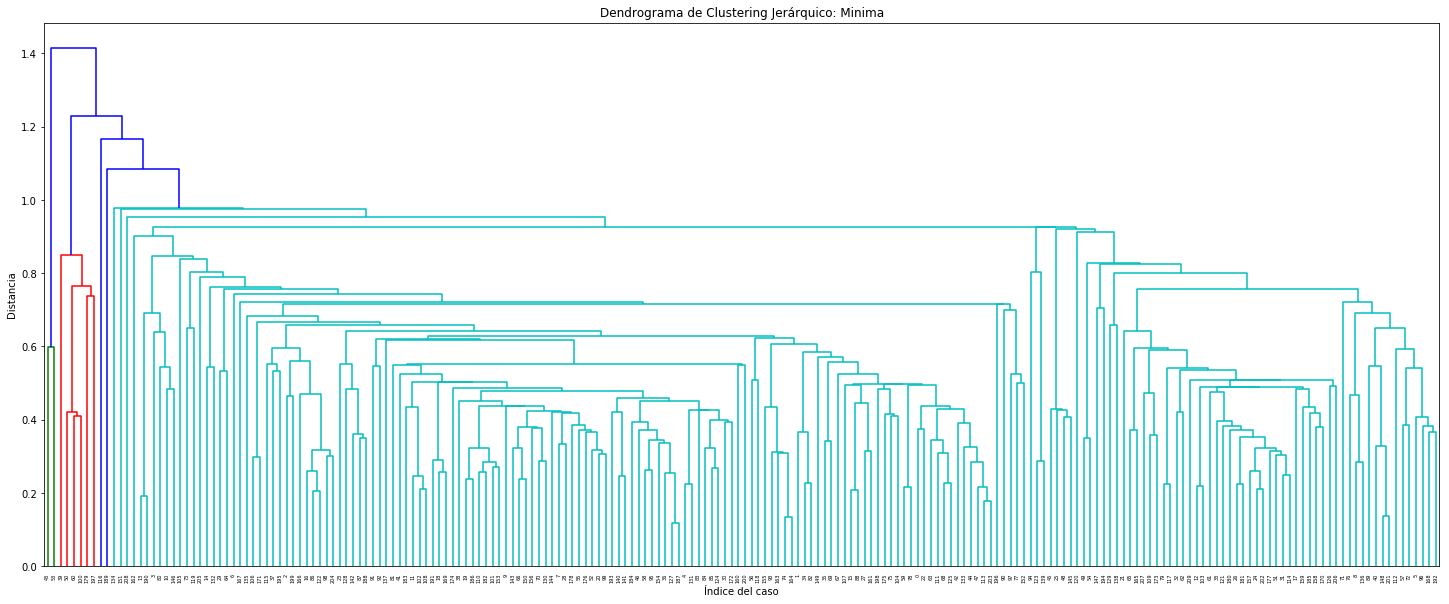

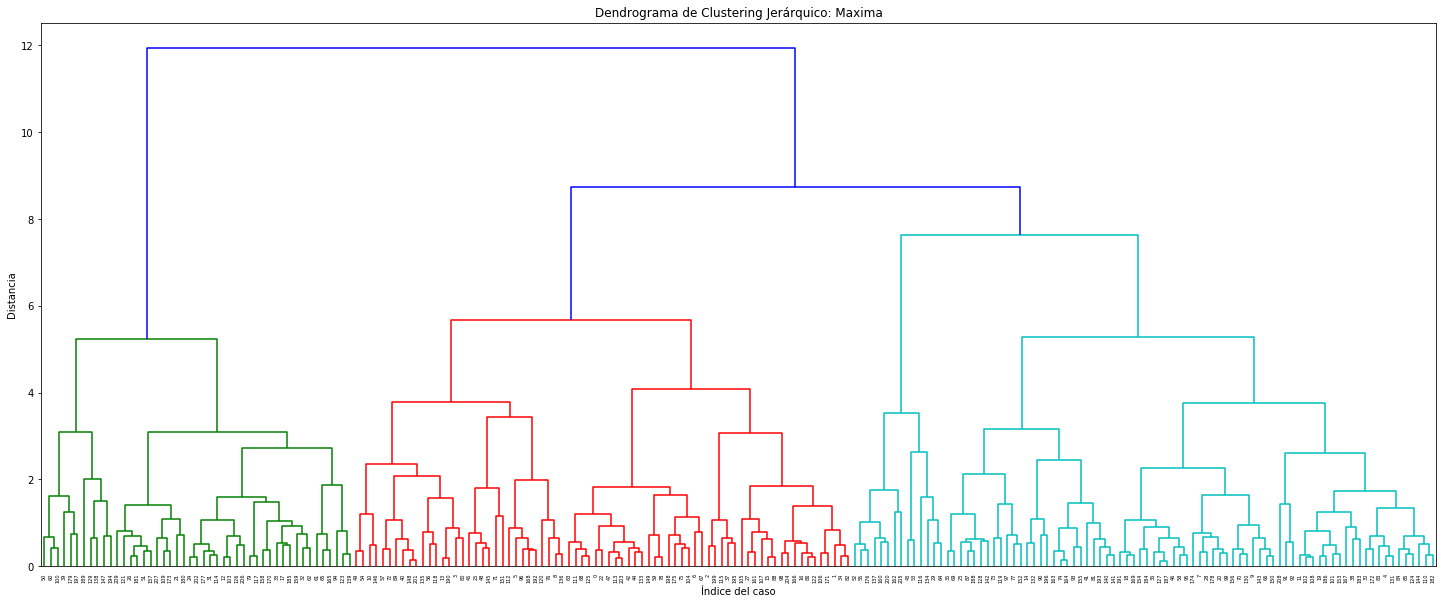

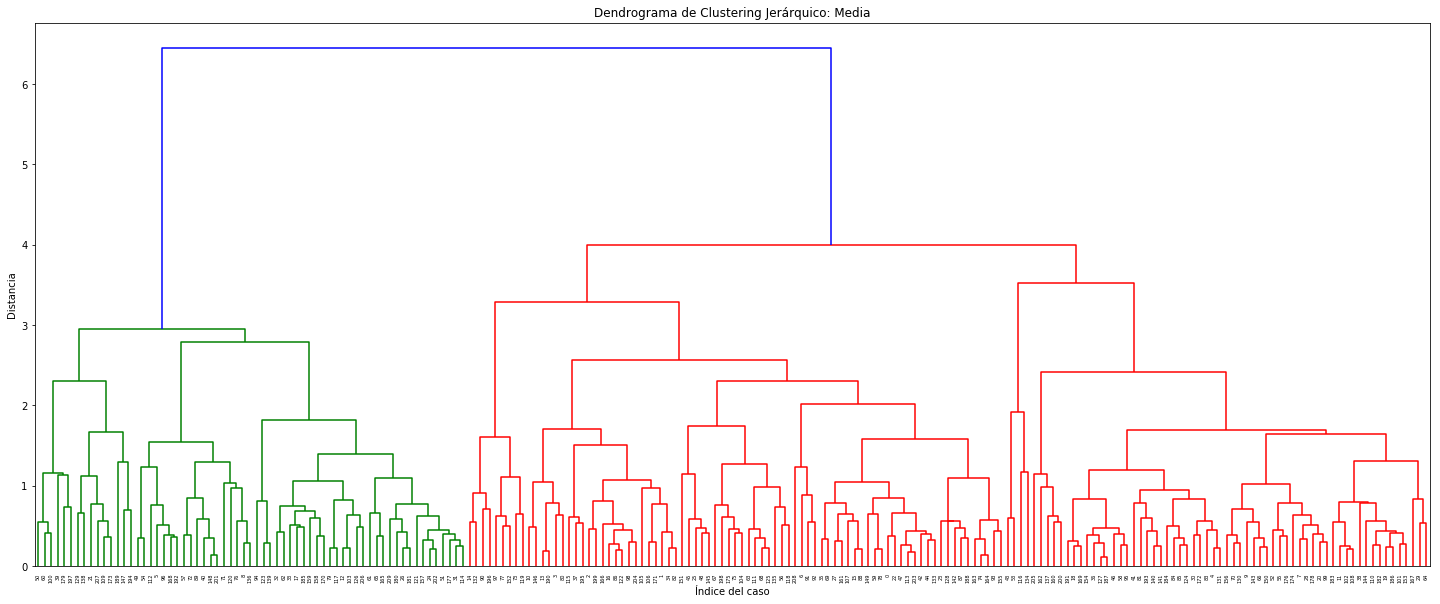

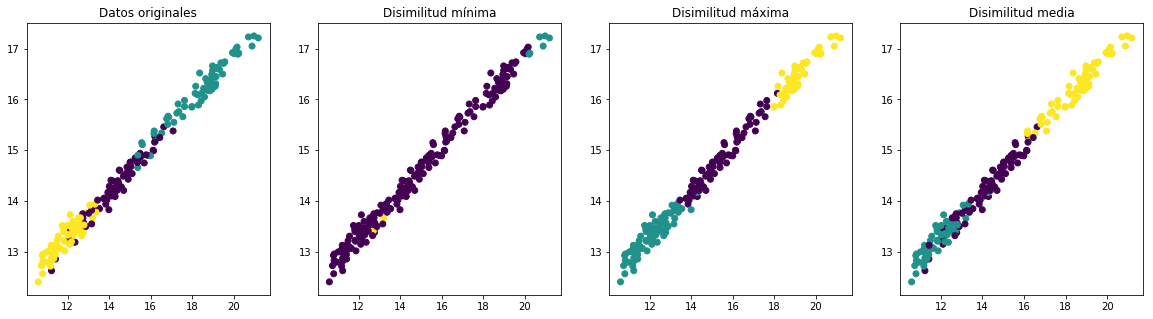

In [3]:
from scipy.cluster.hierarchy import linkage, fcluster, cut_tree

modelo = linkage(Dx, 'single')   # disimilitud mínima
plt.figure(figsize=(25, 10))
plt.title('Dendrograma de Clustering Jerárquico: Minima')
plt.xlabel('Índice del caso')
plt.ylabel('Distancia')
dendrogram(modelo)
plt.show()

modelo = linkage(Dx, 'complete') # disimilitud máxima
plt.figure(figsize=(25, 10))
plt.title('Dendrograma de Clustering Jerárquico: Maxima')
plt.xlabel('Índice del caso')
plt.ylabel('Distancia')
dendrogram(modelo)
plt.show()

modelo = linkage(Dx, 'average')  # disimilitud media
plt.figure(figsize=(25, 10))
plt.title('Dendrograma de Clustering Jerárquico: Media')
plt.xlabel('Índice del caso')
plt.ylabel('Distancia')
dendrogram(modelo)
plt.show()

K=3

def plot_varios(Dx,Dy,K):
    fig, ax = plt.subplots(1,4, figsize=(20,5))
    ax[0].scatter(Dx[:,0], Dx[:,1], c=Dy)
    ax[0].set_title('Datos originales')

    modelo = linkage(Dx, 'single')
    ax[1].scatter(Dx[:,0], Dx[:,1], c=cut_tree(modelo, n_clusters = K).flatten())
    ax[1].set_title('Disimilitud mínima')
    
    modelo = linkage(Dx, 'complete')
    ax[2].scatter(Dx[:,0], Dx[:,1], c=cut_tree(modelo, n_clusters = K).flatten())
    ax[2].set_title('Disimilitud máxima')
    
    modelo = linkage(Dx, 'average')
    ax[3].scatter(Dx[:,0], Dx[:,1], c=cut_tree(modelo, n_clusters = K).flatten())
    ax[3].set_title('Disimilitud media')
    

plot_varios(Dx,Dy,K)



El clustering jerárquico devuelve un espectro de agrupamientos. Muchas veces, es necesario seleccionar una única partición. Dada la matriz mParticiones, esto equivalente a quedarse con una de las columnas. Si queremos seleccionar una partición donde hayan K clústeres, debemos seleccionar la columna K-1. Así, podemos calcular el valor de una métrica de evaluación cualquiera. En este caso, usamos las métricas de ancho de silueta y de Calinski Harabaz:


## 2.2 Evaluacion Extriniseca del Algoritmo seleccinado: Aglomerativo

- Matriz Confusion
- Informacion Mutua
- Valor de Error
- Pureza del Agrupamiento
- Precision
- Recall
- F1
- Entropia


In [4]:
def matriz_confusion(cat_real, cat_pred):
    cats = np.unique(cat_real)
    clusts = np.unique(cat_pred)
    mat = np.array([[np.sum(np.logical_and(cat_real==cats[i],cat_pred==clusts[j])) for j in np.arange(clusts.size)] for i in np.arange(cats.size)])
    return(mat)

def medida_error(mat):
    assign = np.sum([np.max(mat[l,:]) for l in np.arange(mat.shape[0])])
    return 1 - assign / float(np.sum(mat))

def medida_precision(mat, l, k):
    return mat[l,k]/float(np.sum(mat[:,k]))

def medida_recall(mat, l, k):
    return mat[l,k]/float(np.sum(mat[l,:]))

def medida_pureza(mat):
    totales = np.sum(mat,0)/float(np.sum(mat))
    return np.sum([ float(np.sum(mat[:,k]))/float(np.sum(mat))
                   * np.max(mat[:,k]/float(np.sum(mat[:,k]))) for k in np.arange(mat.shape[1])])

def medida_f1_especifica(mat, l, k):
    prec = medida_precision(mat, l, k)
    rec = medida_recall(mat, l, k)
    if (prec+rec)==0:
        return 0
    else:
        return (2*prec*rec)/(prec+rec)

def medida_f1(mat):
    totales = np.sum(mat,1)/float(np.sum(mat))
    assign = np.sum([totales[l] * np.max([medida_f1_especifica(mat, l, k) 
                                          for k in np.arange(mat.shape[1])]) 
                     for l in np.arange(mat.shape[0])])
    return assign

def medida_entropia(mat):
    totales = np.sum(mat,0)/float(np.sum(mat))
    relMat = mat/np.sum(mat,0)
    logRelMat = relMat.copy()
    logRelMat[logRelMat==0]=0.0001 # Evita el logaritmo de 0. Inofensivo pues luego desaparece al multiplicar por 0
    logRelMat = np.log(logRelMat)
    return -np.sum([totales[k] * np.sum([relMat[l,k]*logRelMat[l,k] 
                                         for l in np.arange(mat.shape[0])]) 
                    for k in np.arange(mat.shape[1])])

def medida_informacion_mutua(mat):
    relMat = mat/float(np.sum(mat))
    logRelMat = mat.copy()
    logRelMat = logRelMat/np.sum(mat,0,keepdims=True)
    logRelMat = logRelMat/np.sum(mat,1,keepdims=True)
    logRelMat[logRelMat==0]=0.000001 # Evita el logaritmo de 0. Inofensivo pues luego desaparece al multiplicar por 0
    logRelMat = np.log(float(np.sum(mat))*logRelMat) 
    return np.sum([np.sum([relMat[l,k]*logRelMat[l,k]
                           for l in np.arange(mat.shape[0])])
                   for k in np.arange(mat.shape[1])])




mC = matriz_confusion(Dy,cut_tree(modelo, n_clusters = 3).flatten())  
print("Matriz de Confusion con K=3")
print(mC)
print('La información mutua con K=3 es = ', medida_informacion_mutua(mC))
print('El valor del error cometido con K=3 es = ', medida_error(mC))
print('La pureza del agrupamiento con K=3 obtenido es = ', medida_pureza(mC))
print('Precision de l=1,k=1 con K=3 es :' , medida_precision(mC,1,1))
print('Recall de l=1,k=1  con K=3 es :' , medida_recall(mC,1,1))
print('El valor F1 con K=3 es = ', medida_f1(mC))
print('La entropía con K=3 es = ', medida_entropia(mC))

Matriz de Confusion con K=3
[[66  3  1]
 [ 6  0 64]
 [ 9 61  0]]
La información mutua con K=3 es =  0.783452191021
El valor del error cometido con K=3 es =  0.0904761904762
La pureza del agrupamiento con K=3 obtenido es =  0.909523809524
Precision de l=1,k=1 con K=3 es : 0.0
Recall de l=1,k=1  con K=3 es : 0.0
El valor F1 con K=3 es =  0.910922698258
La entropía con K=3 es =  0.315160097647



## 3. Cargamos el dataset con agrupamiento desconocido   

#### Nota: Por fines practicos, utlizaremos el mismo dataset, pero lo analizamos ignorando el conocimiento de su agrupamiento

## 3.1 Aplicamos el Algoritmo seleccinado: Aglomerativo

 


## 3.1.1 Eleccion de K (Regla del Codo y Carlinski Harabaz)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

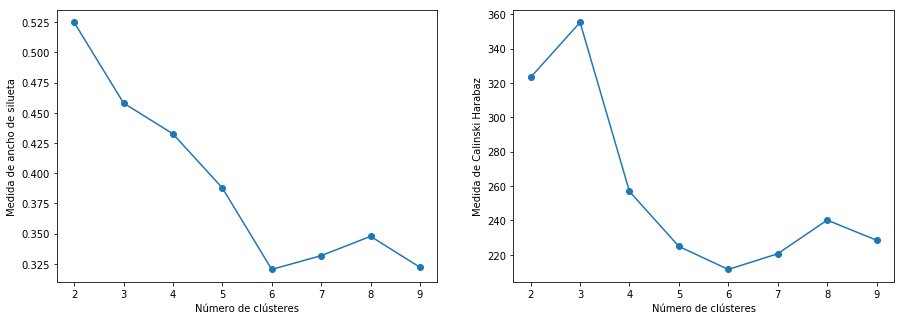

In [5]:


size=10

rsilueta = np.zeros(size)
rch = np.zeros(size)

for K in np.arange(2,size):
    rsilueta[K] = silhouette_score(Dx, cut_tree(modelo, n_clusters = K))
    rch[K] = calinski_harabaz_score(Dx, cut_tree(modelo, n_clusters = K))

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(np.arange(2,size), rsilueta[np.arange(2,size)],
           linestyle='-', marker='o')
ax[0].set_xlabel("Número de clústeres")
ax[0].set_ylabel("Medida de ancho de silueta")

ax[1].plot(np.arange(2,size), rch[np.arange(2,size)],
           linestyle='-', marker='o')
ax[1].set_xlabel("Número de clústeres")
ax[1].set_ylabel("Medida de Calinski Harabaz")

print("")


## 3.2 Evaluacion Intrinseca del Algoritmo seleccinado: Aglomerativo (K=3)

- Silueta
- Calinski-Harabasz
- Davies-Bouldin 

In [6]:
from sklearn.metrics import silhouette_score,calinski_harabaz_score , davies_bouldin_score ,r2_score

K = 3

print('La medida de Silueta con K =',K,'es',silhouette_score(Dx,cut_tree(modelo, n_clusters = K)))
print('La medida de Calinski Harabaz con K =',K,'es',silhouette_score(Dx,cut_tree(modelo, n_clusters = K)))
print('La medida de Davie Bouldin con K =',K,'es',davies_bouldin_score(Dx,cut_tree(modelo, n_clusters = K)))



La medida de Silueta con K = 3 es 0.45811237501
La medida de Calinski Harabaz con K = 3 es 0.45811237501
La medida de Davie Bouldin con K = 3 es 0.760425242988


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
